# Tools for radio-image fitting

This notebooks contains sets of tools to perform image fitting to radio-images using scipy and LMTIT, analyse results and analyse results from image decomposition made by IMFIT. This notebook is integrated with casa, so it operates on numpy-arrays, CASA tasks and astropy+scipy capabilities.

http://localhost:8888/lab?token=bf33c9d7d5f3bbba3ebda7614c84935531575ce87b39584d## Table of Contents

1. [Introduction](#intro) <br>
2. [Source Extraction](#source_extr) <br>
3. [Image fitting with Scipy/LMFIT](#image-fit-lmfit) <br>

    1. [Image fitting with Scipy/LMFIT](#image-fit-lmfit)
    2. Image analysis (non-parametric)
    3. Plotting capabilities
    4. Signal processing

<!-- ## Introduction <a id='intro'></a> -->

<a id='intro'></a>
```
 _            ___       _                 _            _   _             
/ |          |_ _|_ __ | |_ _ __ ___   __| |_   _  ___| |_(_) ___  _ __  
| |  _____    | || '_ \| __| '__/ _ \ / _` | | | |/ __| __| |/ _ \| '_ \ 
| | |_____|   | || | | | |_| | | (_) | (_| | |_| | (__| |_| | (_) | | | |
|_|          |___|_| |_|\__|_|  \___/ \__,_|\__,_|\___|\__|_|\___/|_| |_|

```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import casatasks
from casatasks import *
import casatools
# from casatools import *
from scipy.ndimage import rotate
# import analysisUtils as au
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.fits as pf
from casatools import image as IA
import lmfit
import string
from matplotlib.gridspec import GridSpec
from matplotlib import gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib as mpl
import glob
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import os
from astropy.stats import mad_std
from scipy.ndimage import gaussian_filter
from astropy import visualization
from astropy.visualization import simple_norm
from astropy.convolution import Gaussian2DKernel
import scipy.special as sp
from matplotlib import rcParams,rc
from libs import *
from libs import Gradindex
from libs import polarim
try:
    import casaviewer.imview as imview
except:
    pass


def reset_rc_params():
    mpl.rcParams.update({'font.size': 14, 
        'mathtext.fontset': 'stix',
        "text.usetex": False,
        "font.family": "sans-serif",
        "font.family": "sans",
        "font.serif": ["Exo 2"],
        "font.sans-serif": ["Exo 2"],
        'font.family': 'STIXGeneral', 
        'xtick.labelsize':16,
        'ytick.labelsize':16,
        'axes.labelsize' : 16,
        'xtick.major.width':1,
        'ytick.major.width':1,
        'axes.linewidth':1,
        'lines.linewidth':2,
        'legend.fontsize':14,
        "grid.linestyle":'--',                
        })
    pass
reset_rc_params()



                                                          ..___|**_               
                                                  .|||||||||*+@+*__*++.           
                                              _||||.           .*+;].,#_          
                                         _|||*_                _    .@@@#@.       
                                   _|||||_               .@##@#| _||_             
   Radio Morphen              |****_                   .@.,/\..@_.                
                             #///#+++*|    .       .@@@;#.,.\@.                   
                              .||__|**|||||*||*+@#];_.  ;,;_                      
 Geferson Lucatelli                            +\*_.__|**#
                                              |..      .]]                        
                                               ;@       @.*.                      
                                                #|       _;]];|.                  
                           

In [2]:
import sys
# sys.path.append('../../scripts/analysis_scripts/')
sys.path.append('analysis_scripts/')
sys.path.append('/opt/casa-6.5.1-23-py3.8/')


In [3]:
import analysisUtils as au

You appear to be importing analysisUtils into python (not CASA). version =  3.8.16
CASAPATH is not defined, so I am skipping a lot of imports


In [4]:
from analysisUtils import *

In [5]:
# root_path  = '/run/media/sagauga/storage_wd_2/cloud/onedirve_UoM/PhD/'
root_path  = '../../../PhD/'

## Load List of Images (and their cleaning residuals)

In [6]:
# em_list,em_list_re = get_list_names(root_path=root_path,prefix='*-MFS-image.fits',which_data='eMERLIN_only',source='UGC8696_C')
# em_list,em_list_re = get_list_names(root_path=root_path,prefix='*-MFS-image.cutout.fits',which_data='eMERLIN_only',source='UGC8696_C',cutout_folder='cutouts/')
comb_list,comb_list_re = get_list_names(root_path=root_path,prefix='*taper_0.05asec*-MFS-image.cutout.fits',which_data='combined_data',source='UGC8696_C',cutout_folder='cutouts/')

0 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.-0.2-MFS-image.cutout.fits
1 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.-0.5-MFS-image.cutout.fits
2 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.-0.8-MFS-image.cutout.fits
3 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.-1.0-MFS-image.cutout.fits
4 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.-1.5-MFS-image.cutout.fits
5 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.0.0-MFS-image.cutout.fits
6 >> clean_image_sw_10.0_UGC8696_combined_w_0.75_RR_LL_avg8s_3072_0.006arcsec_10000.briggs.-multiscale.taper_0.05asec.0.2-MFS-image

Lets use a intermediate image between JVLA and e-MERLIN. E.G. one with a robust parameter of 0.0 should be fine (note that the index from the list is `5`) . Lets also loat its residual image.

In [7]:
crop_image = comb_list[5]
crop_residual = comb_list_re[5]

We can plot these images. I am going to use the help function called `fast_plot2`.

Not plotting contours!


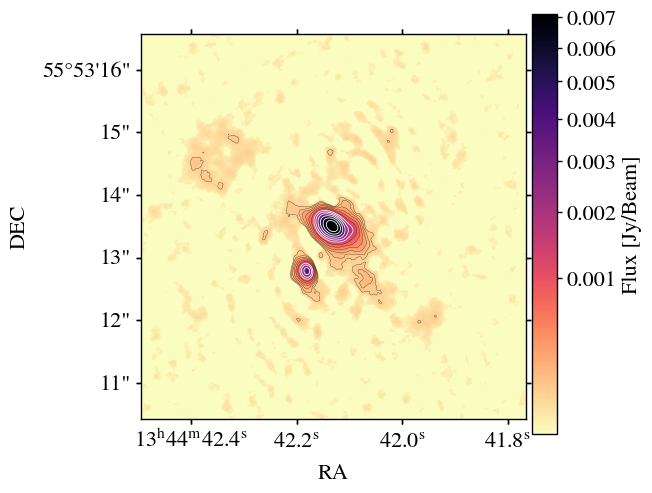

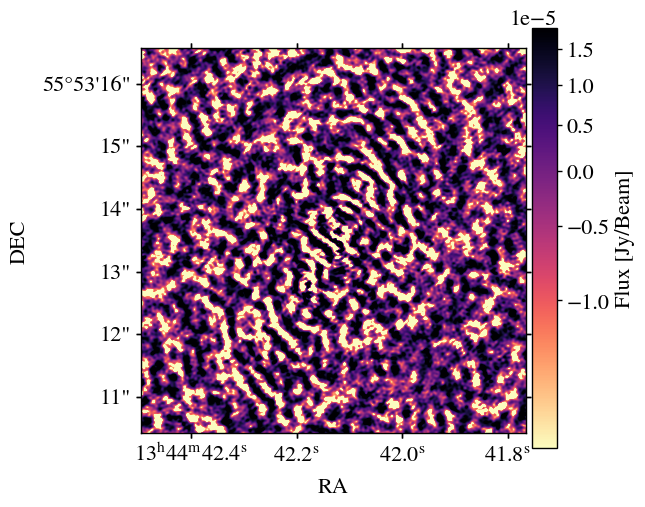

In [8]:
fast_plot2(crop_image)
fast_plot2(crop_residual,vmin_factor=-1.)

<a id='source_extr'></a>

```
 ____             ____                             _____      _                  _   _             
|___ \           / ___|  ___  _   _ _ __ ___ ___  | ____|_  _| |_ _ __ __ _  ___| |_(_) ___  _ __  
  __) |  _____   \___ \ / _ \| | | | '__/ __/ _ \ |  _| \ \/ / __| '__/ _` |/ __| __| |/ _ \| '_ \ 
 / __/  |_____|   ___) | (_) | |_| | | | (_|  __/ | |___ >  <| |_| | | (_| | (__| |_| | (_) | | | |
|_____|          |____/ \___/ \__,_|_|  \___\___| |_____/_/\_\\__|_|  \__,_|\___|\__|_|\___/|_| |_|

````

In order to implement a better way for image fitting onto simple or complex radio sources, it is a good idea to first analyse the images in order to check the background noise emission and perform a simple segmentation and component extraction from the radio emission.

For that, we use here the SEP python package. A help function using it was created and placed in the ```libs.py``` file:

In [9]:
sep_source_ext??

Signature:
sep_source_ext(
    imagename,
    sigma=3.0,
    iterations=2,
    dilation_size=10,
    bw=64,
    bh=64,
    fw=3,
    fh=3,
    ell_size_factor=4,
    apply_mask=False,
)
Docstring: <no docstring>
Source:   
def sep_source_ext(imagename, sigma=3.0, iterations=2, dilation_size=10,
                   bw=64, bh=64, fw=3, fh=3, ell_size_factor=4, apply_mask=False):
    import sep
    import fitsio
    import matplotlib.pyplot as plt
    from matplotlib import rcParams

    data_2D = fitsio.read(imagename)
    m, s = np.mean(data_2D), mad_std(data_2D)
    plt.imshow(data_2D, interpolation='nearest', cmap='gray', vmin=m - s,
               vmax=m + s, origin='lower')
    plt.colorbar()
    bkg = sep.Background(data_2D)
    if apply_mask:
        _, mask = mask_dilation(data_2D, sigma=sigma, iterations=iterations,
                                dilation_size=dilation_size)
    else:
        mask = None
    bkg = sep.Background(data_2D, mask=mask, bw=bw, bh=bh, fw=fw, fh=fh)
  

2.6318382424506126e-06
1.7059253877960145e-05
Not plotting contours!
object 0: flux = 0.100306 +/- 0.316711
object 1: flux = 0.393512 +/- 0.627305


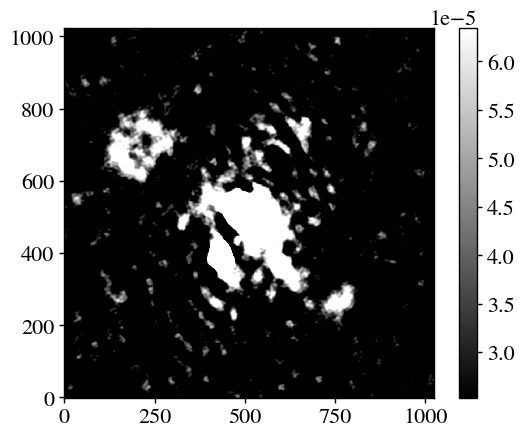

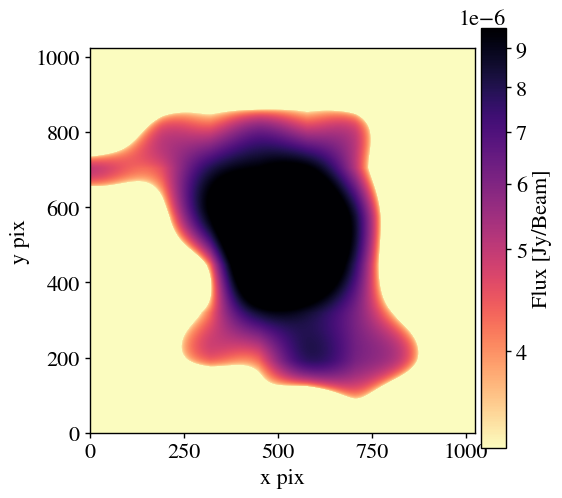

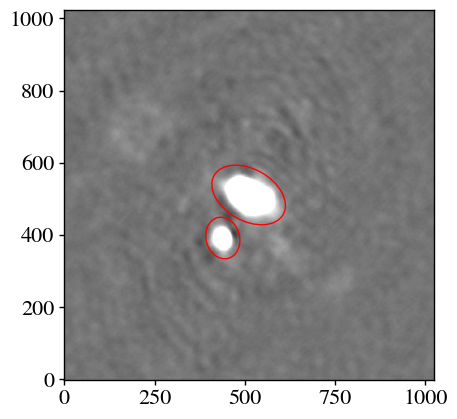

In [10]:
"""
Note, the following values for the background estimation in order to 
extract components are very conservative.  They arre effective on noise and 
outliers, but the resulting data (data - bkg) MUST not be used to compute flux. 

That is left for anoter part of the analysis.
"""
masks, indices = sep_source_ext(crop_image,bw=128,bh=128,fw=3,fh=3,
                                sigma=15,ell_size_factor=4,apply_mask=False)

Now, we have ellipses indicating where sub-components are located on the image. 

We also have the associated masks.

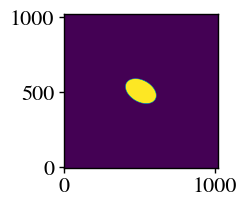

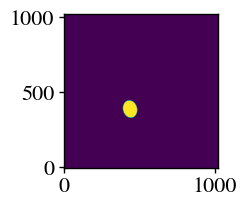

In [11]:
# indices are the indices of each mask in descending order. 
for i in indices:
    plt.figure(figsize=(2,2))
    plt.imshow(masks[i],origin='lower')

We can not estimate the flux yet, because we do not know for sure the limit extension of each component. 

For that, we need some another analysis, such as a Petrosian analysis. 

We have a help function called 

To load the `.fits` image data, just do:

In [12]:
data_2D = ctn(crop_image)

In [13]:
sigma_level = 3
vmin = 3

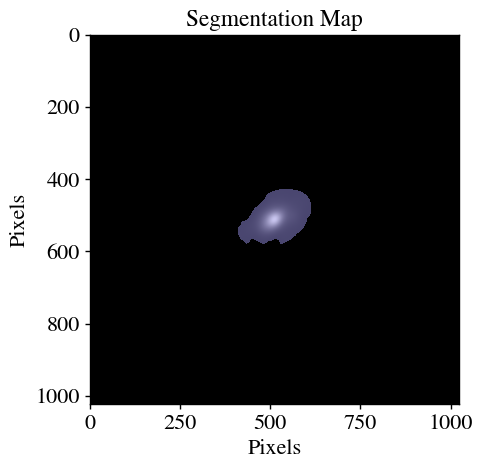

In [14]:
source_props = {}
i = 0 #to be used in indices[0], e.g. first component
ii = str(i+1)
mask_component = masks[indices[i]]
data_component = data_2D*mask_component
cat, segm, segm_deblend = make_catalog(
    image=data_component,
    threshold=sigma_level * mad_std(data_2D),
    deblend=False, #because we already deblended it!
    plot=True, vmax=data_2D.max(), vmin=vmin * mad_std(data_2D)
)

source = cat[0]

source_props['c' + ii + '_PA'] = source.orientation.value
source_props['c' + ii + '_q'] = 1 - source.ellipticity.value
source_props['c' + ii + '_area'] = source.area.value
source_props['c' + ii + '_Re'] = source.equivalent_radius.value
source_props['c' + ii + '_x0c'] = source.xcentroid
source_props['c' + ii + '_y0c'] = source.ycentroid
source_props['c' + ii + '_label'] = source.label

In [15]:
source_props

{'c1_PA': -29.795672364643664,
 'c1_q': 0.6437377315851633,
 'c1_area': 21420.0,
 'c1_Re': 82.57237892937805,
 'c1_x0c': 510.9191543511874,
 'c1_y0c': 510.5635425824134,
 'c1_label': 1}

1


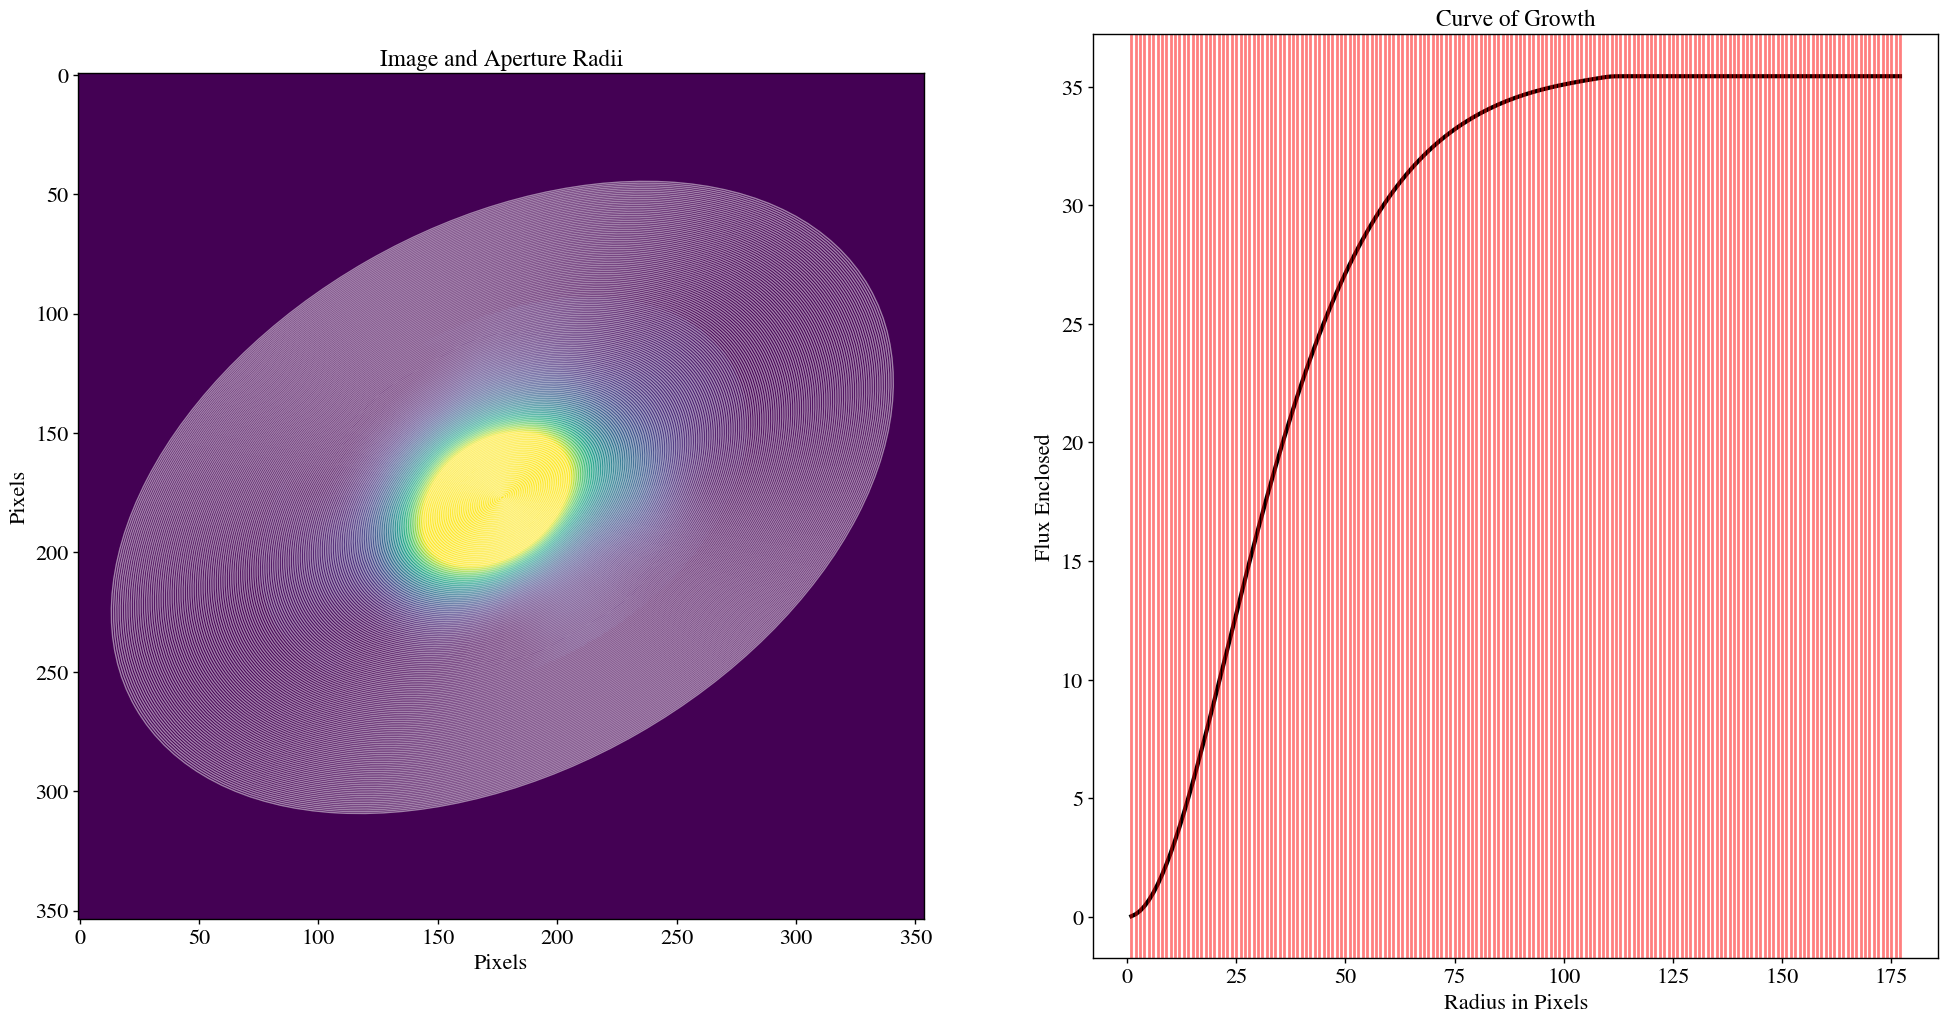

32.07881576315263 35.43848400000001 67.98159631926386


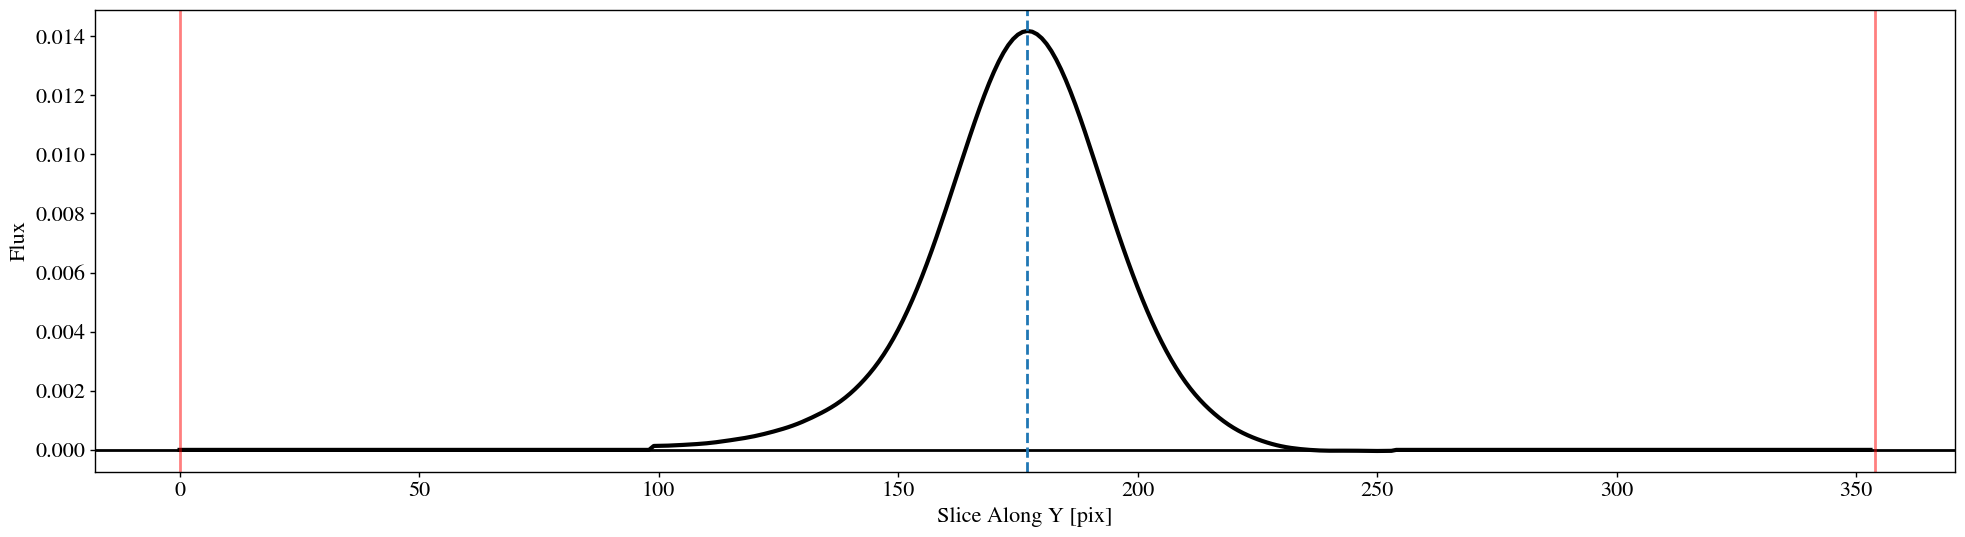

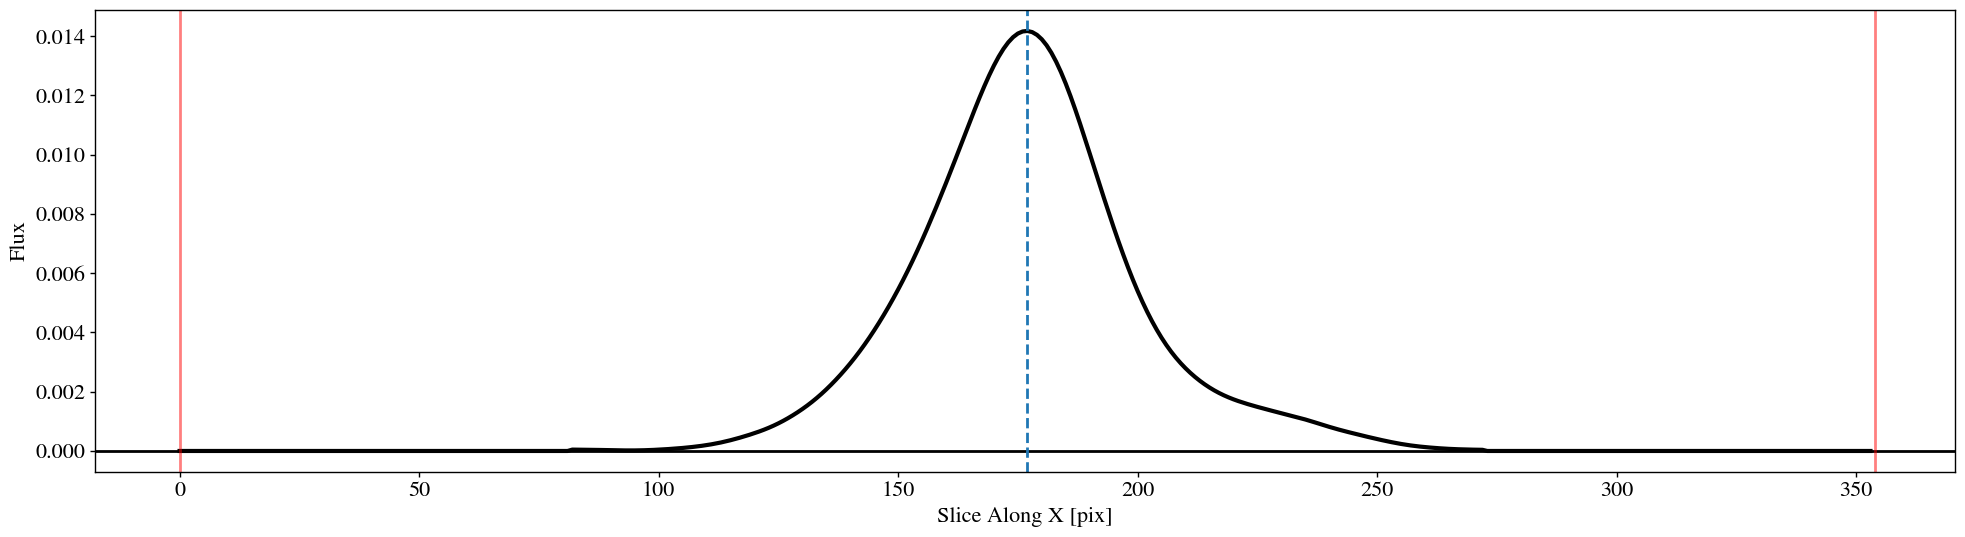

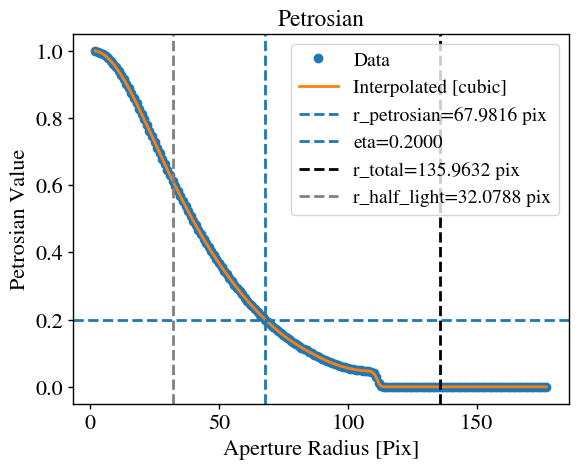

In [16]:
rlast = int(2 * np.sqrt((np.sum(mask_component) / np.pi)))
r_list = make_radius_list(
    max_pix=rlast,  # Max pixel to go up to
    n=int(rlast)  # the number of radii to produce
)
bkg_sub = False
sigma = sigma_level
plot = True
sigma_type='clip'
cutout_size = 2 * max(r_list)
flux_arr, area_arr, error_arr = source_photometry(source, data_component, segm,
                                                  r_list, cutout_size=cutout_size,
                                                  bkg_sub=bkg_sub, sigma=sigma,
                                                  sigma_type=sigma_type,
                                                  plot=plot, vmax=0.3 * data_component.max(),
                                                  vmin=vmin * mad_std(data_component)
                                                  )
p = Petrosian(r_list, area_arr, flux_arr)
R50 = p.r_half_light
Snu = p.total_flux
Rp = p.r_petrosian
plt.figure()
p.plot(plot_r=plot)

print(R50,Snu,Rp)


### Lets put all into a function:

In [17]:
def compute_petro_source(data_2D, mask_component,i=0,source_props={},
                         sigma_level = 3, bkg_sub=False,
                         vmin=1, plot = False, deblend = False,):
    
    # if mask:
    ii = str(i+1)
    data_component = data_2D * mask_component
    cat, segm, segm_deblend = make_catalog(image=data_component,
                                           threshold=sigma_level * mad_std(data_component),
                                           deblend=deblend, #because we already deblended it!
                                           plot=plot, vmax=data_component.max(), 
                                           vmin=vmin * mad_std(data_component))

    source = cat[0]

    source_props['c' + ii + '_PA'] = source.orientation.value
    source_props['c' + ii + '_q'] = 1 - source.ellipticity.value
    source_props['c' + ii + '_area'] = source.area.value
    source_props['c' + ii + '_Re'] = source.equivalent_radius.value
    source_props['c' + ii + '_x0c'] = source.xcentroid
    source_props['c' + ii + '_y0c'] = source.ycentroid
    source_props['c' + ii + '_label'] = source.label
    
    #help function to be used if iteration required.
    source_props = petro_params(source=source, data_2D=data_component, segm=segm,
                            mask_source=mask_component,
                            i=ii, petro_properties=source_props,
                            rlast=None, sigma=sigma_level,
                            vmin=vmin, bkg_sub=bkg_sub,
                            plot=plot)

    """
    Check if Rp is larger than last element (rlast) of the R_list. If yes, 
    we need to run petro_params again, with a larger rlast, at least r_last>=Rp.
    If not, R50 will be np.nan as well Snu. 
    """
    if source_props['c' + ii + '_rlast'] < 2 * source_props['c' + ii + '_Rp']:
        Rlast_new = 2 * source_props['c' + ii + '_Rp'] + 3
        source_props = petro_params(source=source, data_2D=data_component,
                                    segm=segm,mask_source=mask_component,
                                    i=ii, petro_properties=source_props,
                                    rlast=Rlast_new, sigma=sigma_level,
                                    vmin=vmin,
                                    bkg_sub=bkg_sub, plot=plot)

    """
    Now, estimate the effective intensity.
    """
    r, ir = get_profile(data_component, binsize=1.0)
    try:
        I50 = ir[int(source_props['c' + ii + '_R50'])]
    except:
        source_props['c' + ii + '_R50'] = source_props['c' + ii + '_Re']/2
        I50 = ir[int(source_props['c' + ii + '_R50'])]
        # I50 = ir[0]*0.1

    source_props['c' + ii + '_I50'] = I50
    
    return(source_props)

    

1


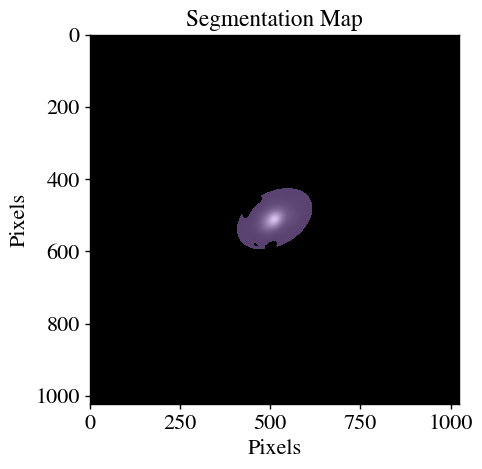

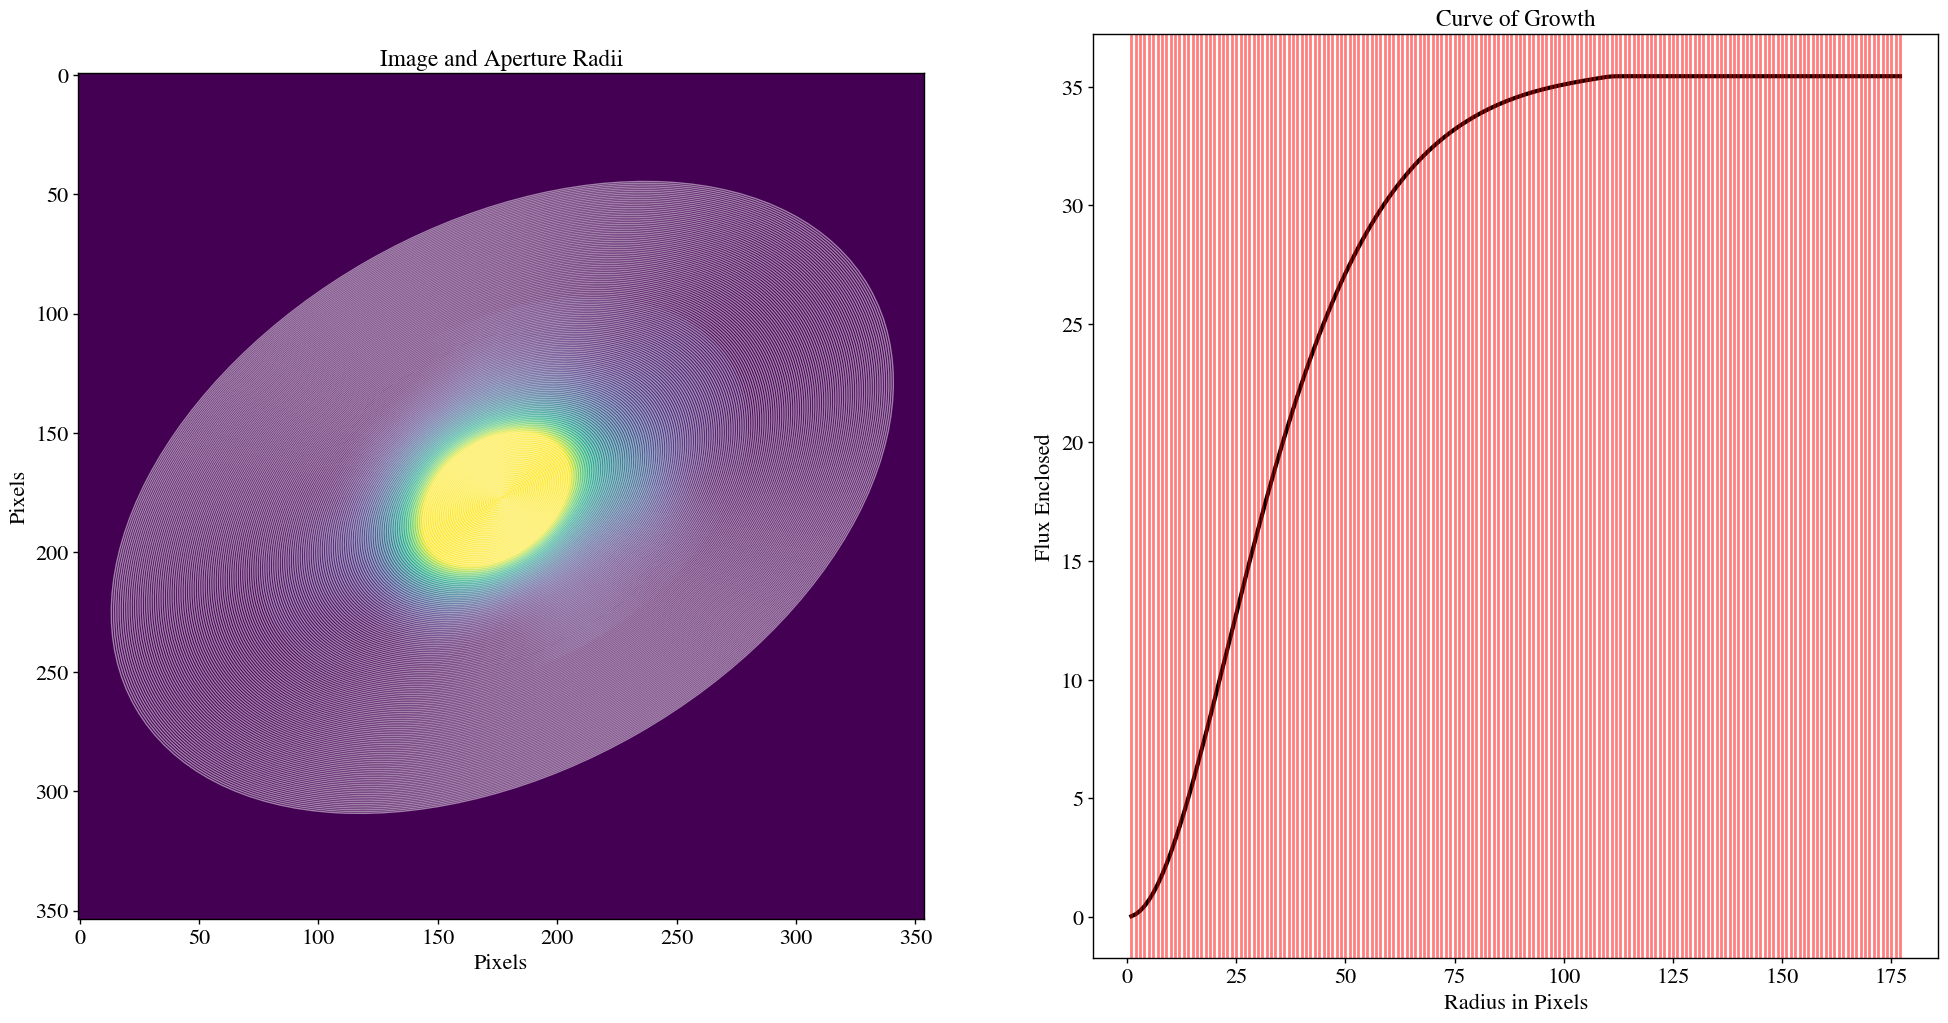

/home/sagauga/pCloudDrive/GitHubUoM/phd_lucatelli_work/analysis/libs.py:2051: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


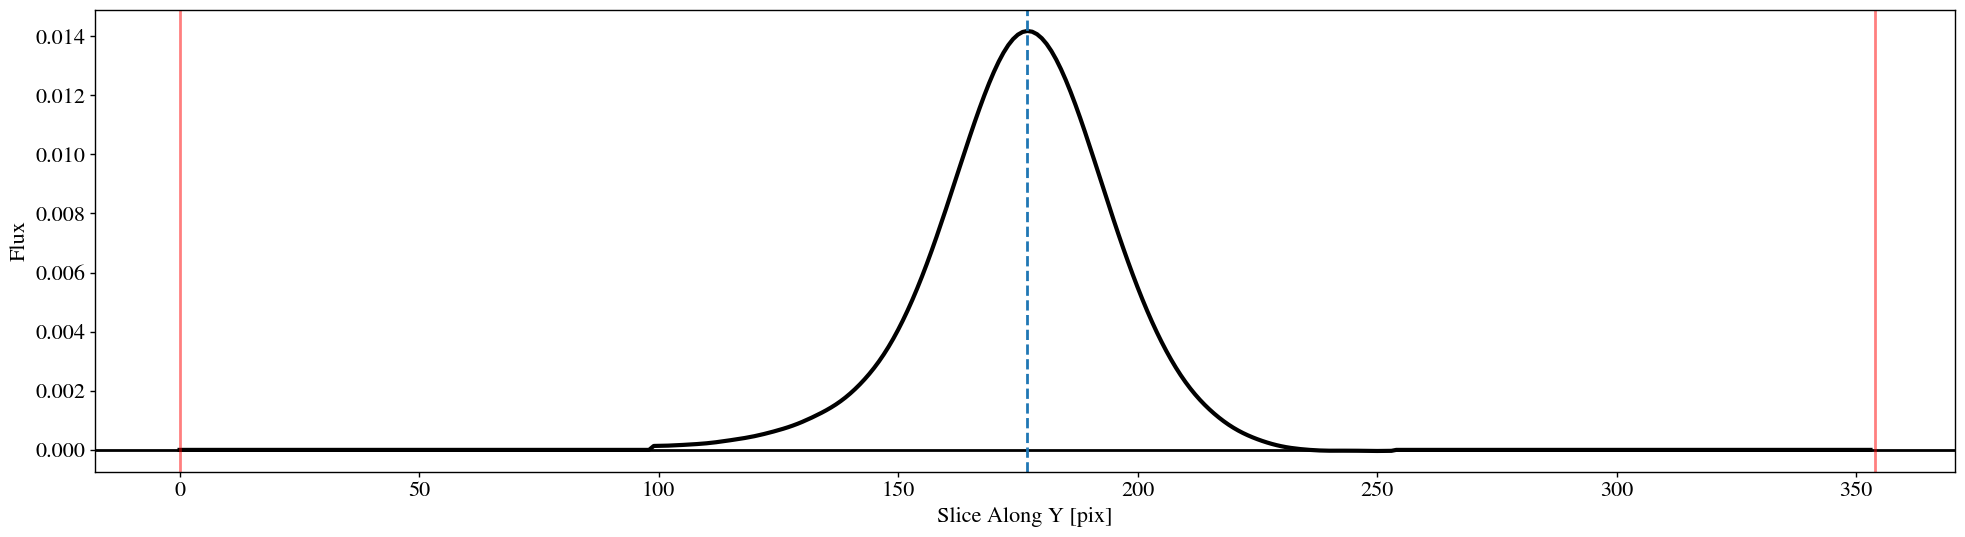

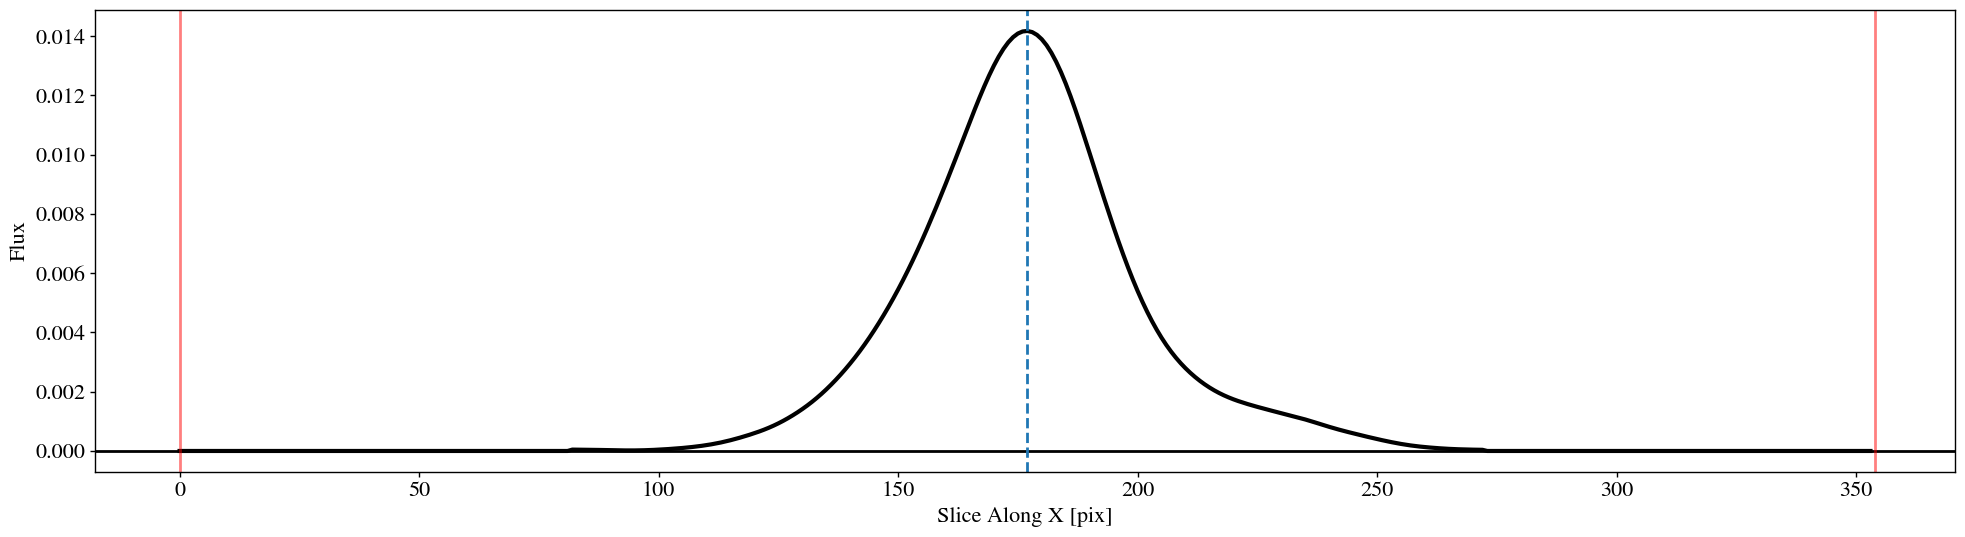

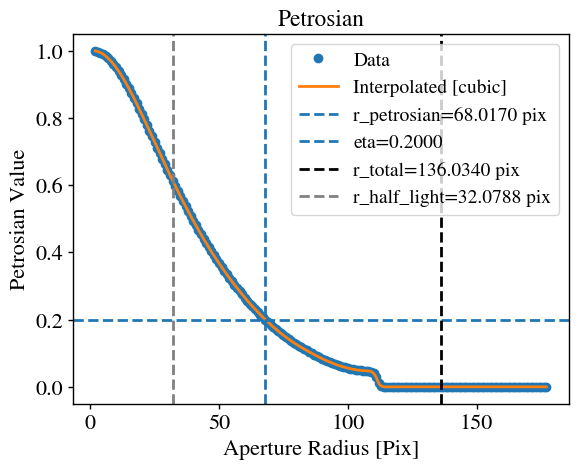

In [18]:
sources_photometry = compute_petro_source(ctn(crop_image),mask_component=mask_component, i=0,plot=True)

In [19]:
sources_photometry

{'c1_PA': -29.766471559126227,
 'c1_q': 0.6435894095406296,
 'c1_area': 24484.0,
 'c1_Re': 88.28079776103029,
 'c1_x0c': 510.8601213414903,
 'c1_y0c': 510.60612120399423,
 'c1_label': 1,
 'c1_R50': 32.07881576315263,
 'c1_Snu': 35.43848400000001,
 'c1_Rp': 68.01700340068014,
 'c1_Rpidx': 136,
 'c1_rlast': 177,
 'c1_I50': 0.0031442595057887958}

## Then, we can loop over all components of the radio emission

In [20]:
# i = 0 #to be used in indices[0], e.g. first component
sources_photometies = {} # init dict to store values. 
for i in range(len(indices)):
    # ii = str(i+1)
    mask_component = masks[indices[i]]
    data_component = data_2D*mask_component
    sources_photometies = compute_petro_source(ctn(crop_image),mask_component=mask_component, 
                                              i=i,plot=False,source_props=sources_photometies)
sources_photometies['ncomps'] = len(indices)

/home/sagauga/pCloudDrive/GitHubUoM/phd_lucatelli_work/analysis/libs.py:2051: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


In [21]:
sources_photometies

{'c1_PA': -29.766471559126227,
 'c1_q': 0.6435894095406296,
 'c1_area': 24484.0,
 'c1_Re': 88.28079776103029,
 'c1_x0c': 510.8601213414903,
 'c1_y0c': 510.60612120399423,
 'c1_label': 1,
 'c1_R50': 32.07881576315263,
 'c1_Snu': 35.43848400000001,
 'c1_Rp': 68.01700340068014,
 'c1_Rpidx': 136,
 'c1_rlast': 177,
 'c1_I50': 0.0031442595057887958,
 'c2_PA': -73.8822798594272,
 'c2_q': 0.722884214073975,
 'c2_area': 7602.0,
 'c2_Re': 49.19137886631332,
 'c2_x0c': 438.42913769512455,
 'c2_y0c': 390.9483076744656,
 'c2_label': 1,
 'c2_R50': 19.95119023804761,
 'c2_Snu': 4.63786000000252,
 'c2_Rp': 40.27685537107421,
 'c2_Rpidx': 80,
 'c2_rlast': 104,
 'c2_I50': 0.0013202373656289032,
 'ncomps': 2}

## We have now basic properties of each component of our radio emission:
- `x0 `  : x-coordinate centre position
- `y0 `  : y-coordinate centre position
- `q  `  : axis ratio
- `PA `  : position angle
- `Snu`  : total flux (sum of pixels)
- `Re `  : effective circular area radii 
- `Rp `  : Petrosian Radius
- `R5 ` : half-light radius
- `I5 ` : effective intensity (I at R50)

These parameters will be used to feed the initial hints for the Sersic Decomposition

```
 _____             ____                _          ____                                           _ _   _             
|___ /            / ___|  ___ _ __ ___(_) ___    |  _ \  ___  ___ ___  _ __ ___  _ __   ___  ___(_) |_(_) ___  _ __  
  |_ \    _____   \___ \ / _ \ '__/ __| |/ __|   | | | |/ _ \/ __/ _ \| '_ ` _ \| '_ \ / _ \/ __| | __| |/ _ \| '_ \ 
 ___) |  |_____|   ___) |  __/ |  \__ \ | (__    | |_| |  __/ (_| (_) | | | | | | |_) | (_) \__ \ | |_| | (_) | | | |
|____/            |____/ \___|_|  |___/_|\___|   |____/ \___|\___\___/|_| |_| |_| .__/ \___/|___/_|\__|_|\___/|_| |_|
                                                                                |_|                                  


```

# Using LMFIT Multi Purpose Sersic Decomposition <a id='image-fit-lmfit'></a>

## 2D Multi-Component Sersic Fitting Using Scipy+LMFIT

## This implementation is not easy and quite complex, but the function do_fit2D deals with everything if initial parameters are provided

In [22]:
msmd = casatools.msmetadata()
ms = casatools.ms()
tb = casatools.table()
cl = casatools.componentlist()
ia = IA()
qa = casatools.quanta()
# ia.open(image)


In [23]:
def create_beam_psf(imname):
    imst = imstat(imname)
    imhd = imhead(imname)
    tb.close()
    direction = "J2000 10h00m00.0s -30d00m00.0s"
    cl.done()
    freq = str(imhd['refval'][2]/1e9)+'GHz'
    majoraxis = str(imhd['restoringbeam']['major']['value'])+str(imhd['restoringbeam']['major']['unit'])
    minoraxis = str(imhd['restoringbeam']['minor']['value'])+str(imhd['restoringbeam']['minor']['unit'])
    pa = str(imhd['restoringbeam']['positionangle']['value'])+str(imhd['restoringbeam']['positionangle']['unit'])
    cl.addcomponent(dir=direction, flux=1.0, fluxunit='Jy', freq=freq,
    shape="Gaussian",majoraxis=majoraxis, minoraxis=minoraxis, positionangle=pa)
    ia.fromshape(imname.replace('-image.cutout.fits','-beampsf.cutout.im'),[151,151,1,1],overwrite=True)
    cs=ia.coordsys()
    cs.setunits(['rad','rad','','Hz'])
    cell_rad=qa.convert(qa.quantity("0.006arcsec"),"rad")['value']
    cs.setincrement([-cell_rad,cell_rad],'direction')
    cs.setreferencevalue([qa.convert("10h",'rad')['value'],qa.convert("-30deg",'rad')['value']],type="direction")
    cs.setreferencevalue(freq,'spectral')
    ia.setcoordsys(cs.torecord())
    ia.setbrightnessunit("Jy/pixel")
    ia.modify(cl.torecord(),subtract=False)
    exportfits(imagename=imname.replace('-image.cutout.fits','-beampsf.cutout.im'),
    fitsimage=imname.replace('-image.cutout.fits','-beampsf.cutout.fits'),overwrite=True)
    cl.close()

In [24]:
create_beam_psf(crop_image)

2023-02-20 21:35:40	WARN	componentlist::close	componentlist closed


In [25]:
n_components = len(indices)
print("# of components to be fitted =", n_components)

# of components to be fitted = 2


In [ ]:
indices
result_mini, mini,result_1,result_extra,model_dict, \
image_results_conv,image_results_deconv = do_fit2D(imagename=crop_image,residualname=crop_residual,
                                                   init_constraints=sources_photometies,
                                                   params_values_init = None,#imfit_conf_values[0:-1],
#                                                    fix_n = False,fix_x0_y0=[False,False,False],
                                                   ncomponents=n_components,constrained=True,fix_n=True,
                                                   method1 = 'nelder',method2 = 'least_squares',
                                                   init_params = 0.25,final_params = 4.0,
                                                   save_name_append='_ls_nfree_IMFIT_opt')

Using clean background for optmization...
Limiting  x0
Limiting  y0
Limiting  x0
Limiting  y0
{'f1_x0': {'value': 510.8601213414903, 'min': 505.8601213414903, 'max': 515.8601213414903}, 'f1_y0': {'value': 510.60612120399423, 'min': 505.60612120399423, 'max': 515.6061212039942}, 'f1_PA': {'value': -29.766471559126227, 'min': -89.76647155912623, 'max': 30.233528440873773}, 'f1_ell': {'value': 0.3564105904593704, 'min': 0.1782052952296852, 'max': 0.7128211809187408}, 'f1_n': {'value': 0.5, 'min': 0.49, 'max': 0.51}, 'f1_In': {'value': 0.31442595057887957, 'min': 0.0003144259505788796, 'max': 0.31442595057887957}, 'f1_Rn': {'value': 3.2078815763152635, 'min': 3.2078815763152635, 'max': 38.49457891578316}, 'f2_x0': {'value': 438.42913769512455, 'min': 433.42913769512455, 'max': 443.42913769512455}, 'f2_y0': {'value': 390.9483076744656, 'min': 385.9483076744656, 'max': 395.9483076744656}, 'f2_PA': {'value': -73.8822798594272, 'min': -133.8822798594272, 'max': -13.8822798594272}, 'f2_ell': {'

In [27]:
result_mini

In [28]:
sources_photometies

{'c1_PA': -29.766471559126227,
 'c1_q': 0.6435894095406296,
 'c1_area': 24484.0,
 'c1_Re': 88.28079776103029,
 'c1_x0c': 510.8601213414903,
 'c1_y0c': 510.60612120399423,
 'c1_label': 1,
 'c1_R50': 32.07881576315263,
 'c1_Snu': 35.43848400000001,
 'c1_Rp': 68.01700340068014,
 'c1_Rpidx': 136,
 'c1_rlast': 177,
 'c1_I50': 0.0031442595057887958,
 'c2_PA': -73.8822798594272,
 'c2_q': 0.722884214073975,
 'c2_area': 7602.0,
 'c2_Re': 49.19137886631332,
 'c2_x0c': 438.42913769512455,
 'c2_y0c': 390.9483076744656,
 'c2_label': 1,
 'c2_R50': 19.95119023804761,
 'c2_Snu': 4.63786000000252,
 'c2_Rp': 40.27685537107421,
 'c2_Rpidx': 80,
 'c2_rlast': 104,
 'c2_I50': 0.0013202373656289032,
 'ncomps': 2}

Peak Pos= [510 512]


/home/sagauga/pCloudDrive/GitHubUoM/phd_lucatelli_work/analysis/libs.py:2051: RuntimeWarning: invalid value encountered in true_divide
  radial_prof = np.histogram(r, bins, weights=(image * weights * mask))[0] / \


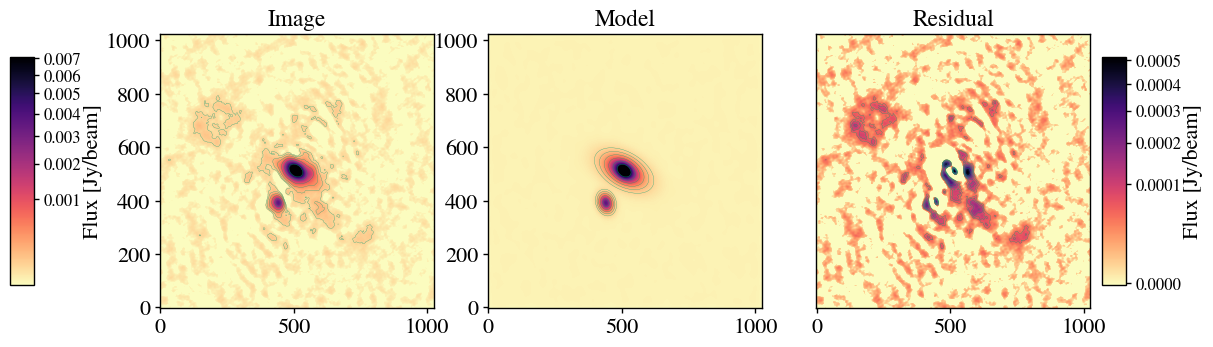

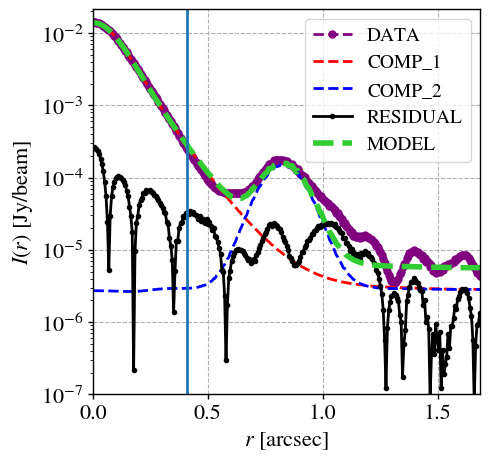

In [63]:
plot_fit_results(crop_image,model_dict,image_results_conv,sources_photometies)

In [ ]:
def plot_fit_results(imagename,model_dict,image_results_conv,sources_photometies):
    fast_plot3(ctn(crop_image), modelname=model_dict['model_total_conv'],
               residualname=model_dict['best_residual_conv'], reference_image=imagename,
               NAME=image_results_conv[-2].replace('.fits','result_image_conv.pdf'),
               crop=False,vmin_factor=0.1,
               box_size=156)

    ncomponents = sources_photometies['ncomps']
    if sources_photometies is not None:
        plotlim = 0
        for i in range(ncomponents):
            plotlim = plotlim + sources_photometies['c' + str(i + 1) + '_rlast']


    model_name = image_results_conv[-2]#crop_image.replace('.fits','')+"_"+str(ncomponents)+"C_model"+special_name+'_IMFIT_opt.fits'
    residual_name = image_results_conv[-1]#crop_image.replace('.fits','')+"_"+str(ncomponents)+"C_residual"+special_name+'_IMFIT_opt.fits'
    cell_size = get_cell_size(imagename)
    profile_data = {}
    center=get_peak_pos(imagename)
    
    for i in range(ncomponents):
        component_name = image_results_conv[i]#crop_image.replace('.fits','')+"_"+str(ncomponents)+"C_model_component_"+str(i+1)+special_name+'_IMFIT_opt.fits'
        Ir_r = get_profile(component_name,
                           center=center)
        profile_data['r'+str(i+1)],profile_data['Ir'+str(i+1)],profile_data['c'+str(i+1)+'_name'] = Ir_r[0], Ir_r[1],component_name
    
    
    r,ir = get_profile(crop_image,center=center)
    rmodel,irmodel = get_profile(model_name,center=center)
    rre,irre = get_profile(residual_name,center=center)



    # plt.plot(radiis[0],profiles[0])
    # plt.plot(radiis[1],profiles[1])
    # plt.plot(radiis[2],np.log(profiles[2]))
    # colors = ['black','purple','gray','red']
    colors = ['red', 'blue', 'teal', 'brown', 'cyan','orange']
    plt.figure(figsize=(5,5))
    plt.plot(r*cell_size,abs(ir),'--.',ms=10,color='purple',alpha=1.0,label='DATA')
    for i in range(ncomponents):
    #     try:
    #         plt.plot(profile_data['r'+str(i+1)],abs(profile_data['Ir'+str(i+1)])[0:r.shape[0]],'--',label='comp'+str(i+1),color=colors[i])
            plt.plot(profile_data['r'+str(i+1)]*cell_size,abs(profile_data['Ir'+str(i+1)]),'--',label='COMP_'+str(i+1),color=colors[i])
    #     except:
    #         pass

    plt.plot(r*cell_size,abs(irre),'.-',label='RESIDUAL',color='black')
    plt.plot(r*cell_size,abs(irmodel),'--',color='limegreen',label='MODEL',linewidth=4)
    plt.semilogy()
    plt.xlabel(r'$r$ [arcsec]')
    plt.ylabel(r'$I(r)$ [Jy/beam]')
    plt.legend()
    plt.ylim(1e-7,-0.005*np.log(ir[0]))
    # plt.xlim(0,3.0)
    plt.grid()
    if sources_photometies is not None:
        plt.xlim(0,plotlim*cell_size)
        idRp_main = int(sources_photometies['c1_Rp'])
        plt.axvline(r[idRp_main]*cell_size)
    plt.savefig(image_results_conv[-2].replace('.fits','result_lmfit_IR.pdf'),dpi=300, bbox_inches='tight')

    # plt.savefig(config_file.replace('params_imfit.csv','result_lmfit_py_IR.pdf'),dpi=300, bbox_inches='tight')

    


In [22]:
def plot_slices(data_2D, residual_2D, model_dict, image_results_conv=None, Rp_props=None):
    plot_slice = np.arange(0, data_2D.shape[0])
    if Rp_props is not None:
        plotlim = 0
        for i in range(Rp_props['ncomps']):
            plotlim = plotlim + Rp_props['c' + str(i + 1) + '_rlast']

    fig = plt.figure(figsize=(6, 6))
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    ax1.plot(plot_slice, np.mean(data_2D, axis=0), '--.', color='purple', ms=14,
             label='DATA')
    ax1.plot(plot_slice, np.mean(model_dict['model_total_conv'], axis=0), '.-',
             color='limegreen', linewidth=4, label='MODEL')
    ax1.plot(plot_slice, np.mean(model_dict['best_residual_conv'], axis=0), '.-',
             color='black', linewidth=4, label='RESIDUAL')
    ax1.plot(plot_slice, np.mean(residual_2D, axis=0), '.-', color='grey',
             linewidth=4, label='MAP RESIDUAL')
    #     ax1.set_xlabel('$x$-slice')
    #     ax1.set_xaxis('off')
    #     ax1.set_xticks([])
    ax1.legend(fontsize=11)
    ax1.grid()
    ax1.set_ylabel('mean $x$ direction')
    if Rp_props is not None:
        ax1.set_xlim(Rp_props['c1_x0c'] - plotlim, Rp_props['c1_x0c'] + plotlim)
    #     ax1.set_title('asd')
    # plt.plot(np.mean(shuffled_image,axis=0),color='red')

    ax2.plot(plot_slice, np.mean(data_2D, axis=1), '--.', color='purple', ms=14,
             label='DATA')
    ax2.plot(plot_slice, np.mean(model_dict['model_total_conv'], axis=1), '.-',
             color='limegreen', linewidth=4, label='MODEL')
    ax2.plot(plot_slice, np.mean(model_dict['best_residual_conv'], axis=1), '.-',
             color='black', linewidth=4, label='RESIDUAL')
    ax2.plot(plot_slice, np.mean(ctn(crop_residual), axis=1), '.-', color='grey',
             linewidth=4, label='MAP RESIDUAL')
    ax2.set_xlabel('Image Slice [px]')
    ax2.set_ylabel('mean $y$ direction')
    if Rp_props is not None:
        ax2.set_xlim(Rp_props['c1_y0c'] - plotlim, Rp_props['c1_y0c'] + plotlim)
    ax2.grid()
    # plt.semilogx()
    # plt.xlim(300,600)
    if image_results_conv is not None:
        plt.savefig(
            image_results_conv.replace('.fits', 'result_lmfit_slices.pdf'),
            dpi=300, bbox_inches='tight')